# Libraries

In [1]:

import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### loading Model



In [2]:
model = tf.keras.models.load_model('trained_model_new.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualizing Single image of test set

In [3]:

import numpy as np
import cv2
import tensorflow as tf

print("NumPy version:", np.__version__)
print("OpenCV version:", cv2.__version__)
print("TensorFlow version:", tf.__version__)



NumPy version: 1.23.5
OpenCV version: 4.12.0
TensorFlow version: 2.10.0


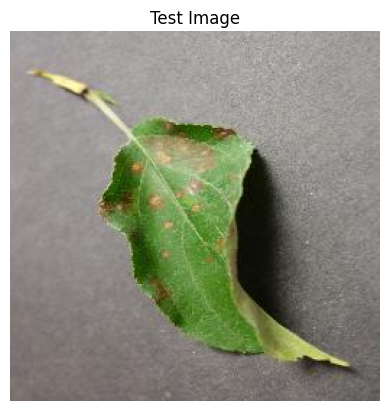

In [4]:
import cv2
import matplotlib.pyplot as plt

image_path = r"test\test\AppleCedarRust3.JPG"
# Step 1: Read the image
img = cv2.imread(image_path)

# Step 2: Check if image is read successfully
if img is None:
    print("Error: Image not found at the specified path.")
else:
    # Step 3: Convert BGR to RGB (important for correct color display in matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Step 4: Display image
    plt.imshow(img_rgb)
    plt.title("Test Image")
    plt.axis('off')
    plt.show()


### Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # Convert Single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [6]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 4s 4s/step


(array([[1.7082624e-07, 2.9084733e-08, 9.9999976e-01, 8.7364036e-09,
         1.7490602e-10, 7.6915772e-09, 1.4438021e-09]], dtype=float32),
 (1, 7))

In [7]:
result_index = np.argmax(prediction)
result_index

2

'Apple___Cedar_apple_rust'

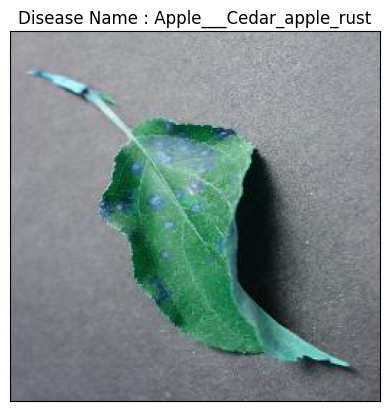

In [8]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

#DisplayingResult of disease prediction

model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name : {model_prediction}")
plt.xticks([])
plt.yticks([])
model_prediction